# 1. The Poisson Model
## The associated data is in the file billboard.csv. Write code to estimate the parameters of the Poisson model using maximum likelihood estimation (MLE). Report your code, the estimated parameters and the maximum value of the log-likelihood. Predict the number of people with 0, ..., 23 exposures based on the Poisson model. Explain how the predicted values are obtained using the case of 2 exposures (show your calculations). Graph the original and predicted number of exposures (number of people on the y-axis and the numbers of exposures on the x-axis).


In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.optimize import minimize

<hr style="border:2px solid black">
<b>Read in the data</b>
<hr style="border:2px solid black">

In [2]:
bbrd = pd.read_csv("billboard.csv")
bbrd.head()

,EXPOSURES,PEOPLE
0,0,48
1,1,37
2,2,30
3,3,24
4,4,20


<hr style="border:2px solid black">
<b>Define the funtions needed</b><br>
<b>1. the log-likelihood</b>
<hr style="border:2px solid black">

In [3]:
def ll_poisson(params, exposures, people):
    lam = params
    
    prob = []
    prob_t =[]
    #probSum = 0
    
# need to consider all periods
    pds = list(range(0, len(exposures)))
    for i in pds:
            prob.append(poisson.pmf(exposures[i],lam))
            prob_t.append(people[i]*np.log(prob[i]))
        
    return sum(prob_t)

<hr style="border:2px solid black">
<b>2. the negative of the log-likelihood</b>
<hr style="border:2px solid black">

In [4]:
def neg_ll_poisson(params, exposures, people):
    return(-np.sum(ll_poisson(params, exposures, people)))

<hr style="border:2px solid black">
<b>Specify the information needed for the optimizer</b>
<hr style="border:2px solid black">

In [5]:
exposures = bbrd.EXPOSURES
people = bbrd.PEOPLE
params = np.mean(exposures)
print(params, ll_poisson(params, exposures, people))
print('neg:', neg_ll_poisson(params, exposures, people))


11.5 -1633.8654592502294
neg: 1633.8654592502294


<hr style="border:2px solid black">
<b>Call the optimizer</b>
<hr style="border:2px solid black">

In [6]:
result_poisson = minimize(
    neg_ll_poisson, 
    params,
    args=(exposures, people))

<hr style="border:2px solid black">
<b>Review the result</b>
<hr style="border:2px solid black">

In [7]:
result_poisson

      fun: 929.0438827272927
 hess_inv: array([[0.0177191]])
      jac: array([7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([4.45600014])

<b>The estimated parameter (λ) for the Poisson model is approximately 4.456, and the maximum value of the log-likelihood is approximately -929.044.<b>

<hr style="border:2px solid black">
<b>Get lambda</b>
<hr style="border:2px solid black">

In [8]:
lamb = result_poisson.x[0]

In [9]:
lamb

4.45600013835675

<hr style="border:2px solid black">
<b>Define a function to make predictions</b>
<hr style="border:2px solid black">

In [10]:
#predTo: number of periods predictions are needed for
#predC: the predictions
def predict(lamb, exposures, predTo, predC, predC_2):
# need to make predictions for all periods
    pds = list(range(0, predTo))
    for i in pds:
        predC[i] = poisson.pmf(exposures[i],lamb) * np.sum(people)
        predC_2[i] = poisson.pmf(exposures[2],lamb) * np.sum(people)


<hr style="border:2px solid black">
<b>Make predictions</b>
<hr style="border:2px solid black">

In [11]:
# number of periods we need predictions for 
predTo = len(bbrd.PEOPLE)
# initialize an array of 0s to hold the predictions
predC = np.zeros(predTo)
predC_2 = np.zeros(predTo)
# make the predictions
predict(lamb, exposures, predTo, predC, predC_2)
predC

array([2.90217594e+00, 1.29320964e+01, 2.88127116e+01, 4.27964824e+01,
       4.76752828e+01, 4.24882134e+01, 3.15545808e+01, 2.00867452e+01,
       1.11883174e+01, 5.53946044e+00, 2.46838365e+00, 9.99919807e-01,
       3.71303567e-01, 1.27271442e-01, 4.05086830e-02, 1.20337798e-02,
       3.35140778e-03, 8.78463150e-04, 2.17468440e-04, 5.10020736e-05,
       1.13632623e-05, 2.41117612e-06, 4.88372779e-07, 9.46169205e-08])

In [12]:
predC_2

array([28.81271164, 28.81271164, 28.81271164, 28.81271164, 28.81271164,
       28.81271164, 28.81271164, 28.81271164, 28.81271164, 28.81271164,
       28.81271164, 28.81271164, 28.81271164, 28.81271164, 28.81271164,
       28.81271164, 28.81271164, 28.81271164, 28.81271164, 28.81271164,
       28.81271164, 28.81271164, 28.81271164, 28.81271164])

<b>The predicted number of people with 2 exposures, based on the Poisson model with λ estimated at approximately 4.456, is about 28.813.<b>

<hr style="border:2px solid black">
<b>Plot the actual values and predictions</b>
<hr style="border:2px solid black">

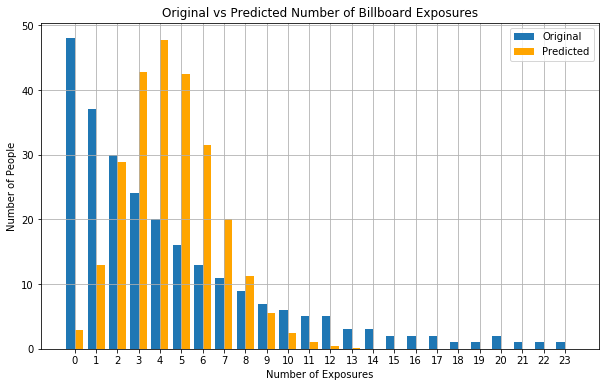

In [13]:
import matplotlib.pyplot as plt

# Plot the original and the predicted number of exposures
plt.figure(figsize=(10, 6))
plt.bar(exposures - 0.2, people, width=0.4, label='Original', align='center')
plt.bar(exposures + 0.2, predC, width=0.4, label='Predicted', align='center', color='orange')
plt.xlabel('Number of Exposures')
plt.ylabel('Number of People')
plt.title('Original vs Predicted Number of Billboard Exposures')
plt.xticks(exposures)
plt.legend()
plt.grid(True)
plt.show()

<b>The graph above displays the original versus the predicted number of people across different exposure levels. The original counts are shown in blue, while the predicted counts, based on the Poisson model with the estimated parameter, are shown in orange.<b>